In [1]:
import numpy as np

from tqdm import tqdm

In [2]:
letter_to_num = {}
letter_to_num['A'] = 0
letter_to_num['C'] = 1
letter_to_num['T'] = 2
letter_to_num['G'] = 3

In [3]:
num_to_letter = {}
num_to_letter[0] = 'A'
num_to_letter[1] = 'C'
num_to_letter[2] = 'T'
num_to_letter[3] = 'G'

In [4]:
def process_spacer(spacer):
    ans = np.zeros(32*4)
    
    for i, letter in enumerate(spacer):
        if letter in letter_to_num.keys():
            ans[i*4 + letter_to_num[letter]] = 1
    return ans
    

In [5]:
def to_array(spacers):
    X = np.zeros((len(spacers), 32 * 4))

    for i, spacer in tqdm(enumerate(spacers)):
        X[i,:] = process_spacer(spacer)
    return X

In [6]:
def to_array_pairs(pairs):
    X = np.zeros((len(pairs), 2, 32 * 4))

    for i, pair in tqdm(enumerate(pairs)):
        X[i,0,:] = process_spacer(pair[0][:32])
        X[i,1,:] = process_spacer(pair[1][:32])
    return X

In [246]:
with open("../data/ES/ES3_R1_spacers.txt") as f:
    lines1 = [x[:31] for x in f.readlines()[1:]]

In [175]:
with open("../data/SlO_10/SlO1_R2_spacers_10.txt") as f:
    lines2 = [x[:32] for x in f.readlines()[1:]]

In [176]:
X = to_array(lines1 + lines2)

325413it [00:05, 58452.29it/s]


In [177]:
X.shape

(325413, 128)

In [178]:
np.save("../data/npy/SlO", X)

#### ans 3

In [104]:
ans_3 = ["CAGCGTCAGGCGTGAAATCTCACCGTCGTTGC	TCGGTTCAGGCGTTGCAAACCTGGCTACCGGG	GTAGTCCATCATTCCACCTATGTCTGAACTCC	CCGGGGGATAATGTTTACGGTCATGCGCCCCC	TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCAG	AAGCTGGCTGGCAATCTCTTTCGGGGTGAGTC	TAGTTTCCGTATCTCCGGATTTATAAAGCTGA	GCAGGCGGCGACGCGCAGGGTATGCGCGATTCG	GCGACCGCTCAGAAATTCCAGACCCGATCCAAA	TCAACATTATCAATTACAACCGACAGGGAGCC	AGCGTGTTCGGCATCACCTTTGGCTTCGGCTG	TGCGTGAGCGTATCGCCGCGCGTCTGCGAAAG",
"GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC	CTGTTTTCGCAAATCTATGGACTATTGCTATT	GGGCGCACGGAATACAAAGCCGTGTATCTGCT	TGGCTCTGCAACAGCAGCACCCATGACCACGT	GAAATGCTGGTGAGCGTTAATGCCGCAAACAC	ATTACGCCTTTTTGCGATTGCCCGGTTTTTGC",
"GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC	ACACGCCCTTATCAAATAGCTGTGATTTACCTA	ATAGACCCCGAACAACAATACGCGCAAACCGA	TACCGTACAGACTGCCGGATATTATTTTTTTG	CTGCTGCTCGAGCTGGTGGAGTGCTGCTATAG	AACGTCAGGTTGTCGCCGCTCTGCGTGGTCGC	TGCATGGCTTTGGCTTCCTCTTTGACGGACGC	ATATATCAGAGCAAAAAACAAAGCCACAGCCA	CATAAAGAAACTATTTTGCGTTTCGTTCAGGT	TTTTACAGTGTCAACAATCGTTCCCTGATTGT	CCGCCGTTGGCACCGTCAAACTCCGGTACTGT	TATAGAGATCGTTTTTGGAATTTACAGCGAGG	CCGTAAGTGGTTTGAGCGATGATATTTGTGCT",
"AGTGCTGGACCATTTCAAATTCACAATAGATT	GGAATGATATTTCAATAAATAATTATAACAAT	CCCTCACACCGATTCGCCAAACGGTGGAGAAG	AGCTGGGCGAAATTTTGATTCATCGTGATGAC"]

In [105]:
ans_3_31 = []
for seq in ans_3:
    for sp in seq.split("\t"):
        ans_3_31.append(sp[:31])

In [106]:
ans_3_31

['CAGCGTCAGGCGTGAAATCTCACCGTCGTTG',
 'TCGGTTCAGGCGTTGCAAACCTGGCTACCGG',
 'GTAGTCCATCATTCCACCTATGTCTGAACTC',
 'CCGGGGGATAATGTTTACGGTCATGCGCCCC',
 'TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCA',
 'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGT',
 'TAGTTTCCGTATCTCCGGATTTATAAAGCTG',
 'GCAGGCGGCGACGCGCAGGGTATGCGCGATT',
 'GCGACCGCTCAGAAATTCCAGACCCGATCCA',
 'TCAACATTATCAATTACAACCGACAGGGAGC',
 'AGCGTGTTCGGCATCACCTTTGGCTTCGGCT',
 'TGCGTGAGCGTATCGCCGCGCGTCTGCGAAA',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT',
 'CTGTTTTCGCAAATCTATGGACTATTGCTAT',
 'GGGCGCACGGAATACAAAGCCGTGTATCTGC',
 'TGGCTCTGCAACAGCAGCACCCATGACCACG',
 'GAAATGCTGGTGAGCGTTAATGCCGCAAACA',
 'ATTACGCCTTTTTGCGATTGCCCGGTTTTTG',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT',
 'ACACGCCCTTATCAAATAGCTGTGATTTACC',
 'ATAGACCCCGAACAACAATACGCGCAAACCG',
 'TACCGTACAGACTGCCGGATATTATTTTTTT',
 'CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA',
 'AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG',
 'TGCATGGCTTTGGCTTCCTCTTTGACGGACG',
 'ATATATCAGAGCAAAAAACAAAGCCACAGCC',
 'CATAAAGAAACTATTTTGCGTTTCGTTCAGG',
 'TTTTACAGTGTCAACAATCGTTCCCT

In [107]:
np.save("../data/npy/ES3_R1_ans_ez", to_array(ans_3_31))

35it [00:00, 18016.77it/s]


In [232]:
ans_3_array = [to_array([y[:31] for y in x.split("\t")]) for x in ans_3]

12it [00:00, 27746.22it/s]
6it [00:00, 22094.67it/s]
13it [00:00, 28295.77it/s]
4it [00:00, 18040.02it/s]


In [70]:
np.savez("./data/npy/ES3_R1_ans.npy", ans_3_array)

#### pairs 3

In [167]:
with open("../data/SlO_10/SlO1_R1_pairs_10.txt") as f:
    lines1 = [x[:-2].split(' ') for x in f.readlines()]

In [168]:
with open("../data/SlO_10/SlO1_R2_pairs_10.txt") as f:
    lines2 = [x[:-2].split(' ') for x in f.readlines()]

In [169]:
lines = lines1 + lines2

In [170]:
len(lines)

96357

In [171]:
X = to_array_pairs(lines)

96357it [00:03, 29787.87it/s]


In [172]:
X[0]

array([[ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0

In [173]:
np.save("../data/npy/SlO_pairs", X)

#### ans 1

In [11]:
K_1 = ['CAGCGTCAGGCGTGAAATCTCACCGTCGTTGC', 'TCGGTTCAGGCGTTGCAAACCTGGCTACCGGG', 
       'GTAGTCCATCATTCCACCTATGTCTGAACTCC', 'CCGGGGGATAATGTTTACGGTCATGCGCCCCC', 
       'TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCAG', 'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGTC',
       'TAGTTTCCGTATCTCCGGATTTATAAAGCTGA', 'GCAGGCGGCGACGCGCAGGGTATGCGCGATTCG', 
       'GCGACCGCTCAGAAATTCCAGACCCGATCCAAA','TCAACATTATCAATTACAACCGACAGGGAGCC', 
       'AGCGTGTTCGGCATCACCTTTGGCTTCGGCTG', 'TGCGTGAGCGTATCGCCGCGCGTCTGCGAAAG']
       
K_2 = ['GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC', 'CTGTTTTCGCAAATCTATGGACTATTGCTATT', 
       'GGGCGCACGGAATACAAAGCCGTGTATCTGCT', 'TGGCTCTGCAACAGCAGCACCCATGACCACGT', 
       'GAAATGCTGGTGAGCGTTAATGCCGCAAACAC', 'ATTACGCCTTTTTGCGATTGCCCGGTTTTTGC']

In [23]:
X_ans = to_array([x[:32] for x in K_1 + K_2])

18it [00:00, 26287.42it/s]


In [24]:
np.save("./data/npy/ES1_R1_ans", X_ans)

#### db 

In [41]:
with open("./data/CRISPR_db_2109.txt") as f:
    lines = f.readlines()

In [46]:
lines_split = [[y for y in x.split("\t")[1:-1] if len(y) > 0] for x in lines] 

In [52]:
all_spacers = set()

In [53]:
for line in tqdm(lines_split):
    for sp in line:
        all_spacers.add(sp)

100%|██████████| 3058/3058 [00:00<00:00, 464094.57it/s]


In [58]:
db = [x[:32] for x in list(all_spacers)]

In [60]:
np.save("./data/npy/db", to_array(db))

1759it [00:00, 59841.84it/s]


# SAME

In [247]:
s = set(ans_3_31)

In [248]:
count = 0
for l in [x[:31] for x in lines1]:
    if l in s:
        count += 1

In [249]:
count

171756

In [250]:
len(lines1)

198255

#### How about some noise?

In [23]:
db = np.load("../data/npy/db.npy")

In [24]:
db.shape

(1759, 128)

In [7]:
noise_matrix_ES1 = np.load("../switch_probs_ES1.npy")

In [28]:
spacer_r = db[0].reshape(-1, 4)

In [31]:
np.where(spacer_r[0])[0][0]

3

In [97]:
x, y = np.where(db.reshape(-1, 32, 4).sum(2) == 0)

In [99]:
np.where(db.reshape(-1, 32, 4).sum(2) == 0)

(array([], dtype=int64), array([], dtype=int64))

In [91]:
(db.reshape(-1, 32, 4).sum(2) == 0)[13][31]

True

In [98]:
for i, j in zip(x, y):
    db[i][j * 4] = 1

In [45]:
def add_noize_arr(spacer, mat):
    spacer_r = spacer.reshape(-1, 4)
    spacer_n = np.zeros_like(spacer_r)
    for i, letter in enumerate(spacer_r):
        #print(letter)
        #print(np.where(letter)[0])
        probs = mat[np.where(letter)[0][0]]
        
        letter_n = np.random.choice([0,1,2,3], p=probs)
    
        spacer_n[i][letter_n] = 1

    #print(changes)
    return spacer_n.flatten()

In [8]:
def add_noize(spacer, mat):
    changes = 0
    noized = []
    for letter in spacer: 
        probs = mat[letter_to_num[letter]]
        
        letter_n = np.random.choice(["A","C","T","G"], p=probs)
        if letter != letter_n:
            changes += 1
            #print(letter, letter_n)
        noized.append(letter_n)

    #print(changes)
    return ''.join(noized)

In [9]:
noise_matrix_ES1[0].sum()

1.0

In [76]:
%timeit add_noize_arr(db[0], noise_matrix_ES1)


1.81 ms ± 47 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [207]:
noise_matrix_ES1

array([[  9.97794183e-01,   1.94532712e-04,   2.43792069e-04,
          1.76749250e-03],
       [  1.07435481e-04,   9.99195923e-01,   6.22314958e-04,
          7.43264336e-05],
       [  2.57768403e-04,   1.78670327e-03,   9.97787611e-01,
          1.67917703e-04],
       [  5.78425309e-04,   8.16095114e-05,   1.05949190e-04,
          9.99234016e-01]])

In [108]:
num = 50000

In [ ]:
noized_lines = np.zeros((num, 128))
originals = np.zeros((num, 128))

c = 0
while c < num:
    for sp in tqdm(db):
        noised = add_noize_arr(sp, noise_matrix_ES1)
        if any(noised != sp):
            noized_lines[c] = noised
            originals[c] = sp
            c += 1
        if c == 5000:
            break
    print(c)

  3%|▎         | 49/1759 [00:00<00:03, 487.58it/s]

74


  3%|▎         | 47/1759 [00:00<00:03, 462.68it/s]

142


  2%|▏         | 41/1759 [00:00<00:04, 404.57it/s]

232


  3%|▎         | 46/1759 [00:00<00:03, 451.63it/s]

308


  3%|▎         | 49/1759 [00:00<00:03, 482.78it/s]

382


  3%|▎         | 49/1759 [00:00<00:03, 489.56it/s]

473


  3%|▎         | 51/1759 [00:00<00:03, 509.75it/s]

557


  3%|▎         | 49/1759 [00:00<00:03, 482.94it/s]

648


  3%|▎         | 44/1759 [00:00<00:03, 437.33it/s]

736


  3%|▎         | 50/1759 [00:00<00:03, 496.73it/s]

821


  3%|▎         | 44/1759 [00:00<00:03, 435.71it/s]

893


  3%|▎         | 47/1759 [00:00<00:03, 469.10it/s]

981


  3%|▎         | 47/1759 [00:00<00:03, 464.42it/s]

1060


  3%|▎         | 45/1759 [00:00<00:03, 446.81it/s]

1140


  3%|▎         | 47/1759 [00:00<00:03, 462.54it/s]

1222


  3%|▎         | 51/1759 [00:00<00:03, 506.84it/s]

1297


  3%|▎         | 50/1759 [00:00<00:03, 494.69it/s]

1388


  3%|▎         | 47/1759 [00:00<00:03, 464.51it/s]

1474


  3%|▎         | 51/1759 [00:00<00:03, 504.59it/s]

1549


  3%|▎         | 51/1759 [00:00<00:03, 503.03it/s]

1620


  3%|▎         | 46/1759 [00:00<00:03, 456.82it/s]

1691


  3%|▎         | 46/1759 [00:00<00:03, 457.01it/s]

1758


  3%|▎         | 46/1759 [00:00<00:03, 457.35it/s]

1833


  3%|▎         | 47/1759 [00:00<00:03, 469.30it/s]

1908


  3%|▎         | 47/1759 [00:00<00:03, 462.81it/s]

1992


  3%|▎         | 49/1759 [00:00<00:03, 486.19it/s]

2059


  3%|▎         | 49/1759 [00:00<00:03, 486.44it/s]

2140


  3%|▎         | 47/1759 [00:00<00:03, 467.78it/s]

2225


  3%|▎         | 50/1759 [00:00<00:03, 491.67it/s]

2301


  3%|▎         | 49/1759 [00:00<00:03, 486.88it/s]

2385


  3%|▎         | 47/1759 [00:00<00:03, 466.12it/s]

2468


  3%|▎         | 47/1759 [00:00<00:03, 462.73it/s]

2553


  3%|▎         | 45/1759 [00:00<00:03, 442.41it/s]

2638


  3%|▎         | 47/1759 [00:00<00:03, 467.22it/s]

2717


  3%|▎         | 50/1759 [00:00<00:03, 495.63it/s]

2801


  3%|▎         | 50/1759 [00:00<00:03, 490.85it/s]

2880


  3%|▎         | 48/1759 [00:00<00:03, 473.72it/s]

2955


  3%|▎         | 51/1759 [00:00<00:03, 503.02it/s]

3026


  3%|▎         | 46/1759 [00:00<00:03, 455.48it/s]

3093


  3%|▎         | 48/1759 [00:00<00:03, 475.55it/s]

3177


  3%|▎         | 48/1759 [00:00<00:03, 475.00it/s]

3267


  3%|▎         | 48/1759 [00:00<00:03, 477.64it/s]

3353


  3%|▎         | 51/1759 [00:00<00:03, 500.86it/s]

3416


  3%|▎         | 49/1759 [00:00<00:03, 481.67it/s]

3495


  3%|▎         | 50/1759 [00:00<00:03, 496.34it/s]

3576


  3%|▎         | 45/1759 [00:00<00:03, 449.79it/s]

3675


  3%|▎         | 50/1759 [00:00<00:03, 494.97it/s]

3743


  3%|▎         | 50/1759 [00:00<00:03, 493.38it/s]

3827


  3%|▎         | 50/1759 [00:00<00:03, 491.06it/s]

3913


  3%|▎         | 47/1759 [00:00<00:03, 467.28it/s]

3989


  3%|▎         | 46/1759 [00:00<00:03, 452.17it/s]

4091


  3%|▎         | 51/1759 [00:00<00:03, 502.25it/s]

4164


  3%|▎         | 47/1759 [00:00<00:03, 461.83it/s]

4242


  3%|▎         | 47/1759 [00:00<00:03, 468.01it/s]

4317


  3%|▎         | 51/1759 [00:00<00:03, 508.33it/s]

4406


  3%|▎         | 44/1759 [00:00<00:03, 430.43it/s]

4501


  3%|▎         | 51/1759 [00:00<00:03, 509.61it/s]

4574


  3%|▎         | 50/1759 [00:00<00:03, 494.10it/s]

4654


  3%|▎         | 49/1759 [00:00<00:03, 485.48it/s]

4723


  3%|▎         | 50/1759 [00:00<00:03, 488.60it/s]

4805


  3%|▎         | 47/1759 [00:00<00:03, 467.95it/s]

4885


  3%|▎         | 51/1759 [00:00<00:03, 502.65it/s]

4976


  3%|▎         | 50/1759 [00:00<00:03, 491.85it/s]

5000
5000
5000
5000


  3%|▎         | 51/1759 [00:00<00:03, 504.42it/s]

5079


  3%|▎         | 49/1759 [00:00<00:03, 489.09it/s]

5168


  3%|▎         | 51/1759 [00:00<00:03, 502.70it/s]

5254


  3%|▎         | 51/1759 [00:00<00:03, 508.07it/s]

5338


  3%|▎         | 48/1759 [00:00<00:03, 471.87it/s]

5430


  3%|▎         | 48/1759 [00:00<00:03, 470.41it/s]

5505


  3%|▎         | 51/1759 [00:00<00:03, 504.76it/s]

5573


  3%|▎         | 50/1759 [00:00<00:03, 495.87it/s]

5654


  3%|▎         | 51/1759 [00:00<00:03, 504.13it/s]

5731


  3%|▎         | 51/1759 [00:00<00:03, 500.84it/s]

5802


  3%|▎         | 50/1759 [00:00<00:03, 494.89it/s]

5858


  3%|▎         | 48/1759 [00:00<00:03, 479.74it/s]

5933


  3%|▎         | 47/1759 [00:00<00:03, 469.45it/s]

6006


  3%|▎         | 47/1759 [00:00<00:03, 463.33it/s]

6089


  3%|▎         | 49/1759 [00:00<00:03, 483.87it/s]

6169


  3%|▎         | 48/1759 [00:00<00:03, 478.65it/s]

6241


  2%|▏         | 43/1759 [00:00<00:04, 427.57it/s]

6319


  3%|▎         | 44/1759 [00:00<00:03, 436.30it/s]

6397


  3%|▎         | 50/1759 [00:00<00:03, 494.91it/s]

6470


  3%|▎         | 46/1759 [00:00<00:03, 458.90it/s]

6549


  3%|▎         | 47/1759 [00:00<00:03, 465.17it/s]

6629


  3%|▎         | 48/1759 [00:00<00:03, 478.28it/s]

6716


  3%|▎         | 48/1759 [00:00<00:03, 476.34it/s]

6799


  3%|▎         | 48/1759 [00:00<00:03, 474.25it/s]

6874


  3%|▎         | 52/1759 [00:00<00:03, 510.70it/s]

6956


  3%|▎         | 46/1759 [00:00<00:03, 458.30it/s]

7022


  3%|▎         | 51/1759 [00:00<00:03, 501.22it/s]

7096


  3%|▎         | 45/1759 [00:00<00:03, 442.46it/s]

7169


  3%|▎         | 45/1759 [00:00<00:03, 447.64it/s]

7252


  3%|▎         | 47/1759 [00:00<00:03, 465.38it/s]

7329


  3%|▎         | 46/1759 [00:00<00:03, 458.58it/s]

7413


  3%|▎         | 50/1759 [00:00<00:03, 490.85it/s]

7493


  3%|▎         | 45/1759 [00:00<00:03, 449.33it/s]

7578


  3%|▎         | 45/1759 [00:00<00:03, 447.08it/s]

7650


  3%|▎         | 45/1759 [00:00<00:03, 445.47it/s]

7722


  3%|▎         | 44/1759 [00:00<00:03, 438.62it/s]

7820


  3%|▎         | 44/1759 [00:00<00:03, 438.38it/s]

7907


  3%|▎         | 51/1759 [00:00<00:03, 501.40it/s]

7962


  3%|▎         | 52/1759 [00:00<00:03, 512.60it/s]

8041


  3%|▎         | 48/1759 [00:00<00:03, 472.96it/s]

8135


  3%|▎         | 51/1759 [00:00<00:03, 501.66it/s]

8227


  3%|▎         | 45/1759 [00:00<00:03, 444.01it/s]

8310


  3%|▎         | 49/1759 [00:00<00:03, 485.16it/s]

8392


  3%|▎         | 49/1759 [00:00<00:03, 483.61it/s]

8474


  2%|▏         | 42/1759 [00:00<00:04, 416.08it/s]

8557


  3%|▎         | 46/1759 [00:00<00:03, 456.08it/s]

8653


  3%|▎         | 48/1759 [00:00<00:03, 473.58it/s]

8734


  3%|▎         | 47/1759 [00:00<00:03, 464.10it/s]

8817


  2%|▏         | 42/1759 [00:00<00:04, 416.45it/s]

8901


  3%|▎         | 46/1759 [00:00<00:03, 450.80it/s]

8996


  2%|▏         | 41/1759 [00:00<00:04, 406.42it/s]

9090


  3%|▎         | 47/1759 [00:00<00:03, 460.41it/s]

9162


  3%|▎         | 47/1759 [00:00<00:03, 464.85it/s]

9248


  3%|▎         | 50/1759 [00:00<00:03, 495.79it/s]

9334


  3%|▎         | 50/1759 [00:00<00:03, 496.68it/s]

9416


  3%|▎         | 48/1759 [00:00<00:03, 479.63it/s]

9506


  3%|▎         | 49/1759 [00:00<00:03, 483.21it/s]

9607


  3%|▎         | 52/1759 [00:00<00:03, 518.49it/s]

9681


  2%|▏         | 42/1759 [00:00<00:04, 416.48it/s]

9767


  3%|▎         | 46/1759 [00:00<00:03, 452.19it/s]

9834


  3%|▎         | 51/1759 [00:00<00:03, 508.49it/s]

9928


  3%|▎         | 48/1759 [00:00<00:03, 473.61it/s]

10031


  3%|▎         | 50/1759 [00:00<00:03, 497.54it/s]

10109


  3%|▎         | 48/1759 [00:00<00:03, 479.03it/s]

10217


  3%|▎         | 50/1759 [00:00<00:03, 493.31it/s]

10286


  3%|▎         | 48/1759 [00:00<00:03, 473.57it/s]

10383


  3%|▎         | 48/1759 [00:00<00:03, 476.13it/s]

10476


  3%|▎         | 50/1759 [00:00<00:03, 499.53it/s]

10565


  3%|▎         | 50/1759 [00:00<00:03, 499.41it/s]

10651


  3%|▎         | 49/1759 [00:00<00:03, 489.34it/s]

10728


  3%|▎         | 52/1759 [00:00<00:03, 519.52it/s]

10810


  3%|▎         | 48/1759 [00:00<00:03, 474.72it/s]

10894


  3%|▎         | 48/1759 [00:00<00:03, 472.83it/s]

10965


  3%|▎         | 50/1759 [00:00<00:03, 491.40it/s]

11049


  3%|▎         | 49/1759 [00:00<00:03, 486.80it/s]

11140


  3%|▎         | 50/1759 [00:00<00:03, 491.50it/s]

11227


  3%|▎         | 52/1759 [00:00<00:03, 510.84it/s]

11299


  3%|▎         | 51/1759 [00:00<00:03, 503.90it/s]

11374


  3%|▎         | 48/1759 [00:00<00:03, 479.10it/s]

11449


  3%|▎         | 49/1759 [00:00<00:03, 483.36it/s]

11531


  3%|▎         | 48/1759 [00:00<00:03, 478.67it/s]

11615


  3%|▎         | 51/1759 [00:00<00:03, 502.65it/s]

11699


  3%|▎         | 48/1759 [00:00<00:03, 473.41it/s]

11784


  3%|▎         | 50/1759 [00:00<00:03, 492.05it/s]

11878


  3%|▎         | 49/1759 [00:00<00:03, 484.58it/s]

11956


  3%|▎         | 52/1759 [00:00<00:03, 515.64it/s]

12039


  3%|▎         | 51/1759 [00:00<00:03, 508.75it/s]

12119


  3%|▎         | 49/1759 [00:00<00:03, 482.69it/s]

12193


  3%|▎         | 49/1759 [00:00<00:03, 487.86it/s]

12277


  3%|▎         | 53/1759 [00:00<00:03, 523.75it/s]

12350


  3%|▎         | 53/1759 [00:00<00:03, 520.56it/s]

12425


  3%|▎         | 46/1759 [00:00<00:03, 457.84it/s]

12492


  3%|▎         | 51/1759 [00:00<00:03, 509.32it/s]

12583


  3%|▎         | 47/1759 [00:00<00:03, 468.80it/s]

12678


  3%|▎         | 51/1759 [00:00<00:03, 503.08it/s]

12747


  3%|▎         | 51/1759 [00:00<00:03, 505.19it/s]

12822


  3%|▎         | 49/1759 [00:00<00:03, 480.48it/s]

12921


  3%|▎         | 49/1759 [00:00<00:03, 486.06it/s]

13006


  3%|▎         | 51/1759 [00:00<00:03, 502.58it/s]

13078


  3%|▎         | 52/1759 [00:00<00:03, 518.97it/s]

13149


  3%|▎         | 50/1759 [00:00<00:03, 491.25it/s]

13223


  3%|▎         | 50/1759 [00:00<00:03, 492.15it/s]

13298


  3%|▎         | 48/1759 [00:00<00:03, 479.79it/s]

13385


  3%|▎         | 53/1759 [00:00<00:03, 524.02it/s]

13470


  3%|▎         | 45/1759 [00:00<00:03, 444.86it/s]

13549


  3%|▎         | 48/1759 [00:00<00:03, 477.84it/s]

13630


  2%|▏         | 43/1759 [00:00<00:04, 425.74it/s]

13715


  3%|▎         | 51/1759 [00:00<00:03, 503.68it/s]

13794


  3%|▎         | 52/1759 [00:00<00:03, 515.54it/s]

13877


  3%|▎         | 48/1759 [00:00<00:03, 476.38it/s]

13968


  3%|▎         | 46/1759 [00:00<00:03, 448.92it/s]

14051


  3%|▎         | 51/1759 [00:00<00:03, 504.25it/s]

14135


  3%|▎         | 45/1759 [00:00<00:03, 448.92it/s]

14213


  3%|▎         | 48/1759 [00:00<00:03, 477.19it/s]

14284


  3%|▎         | 48/1759 [00:00<00:03, 478.86it/s]

14370


  3%|▎         | 47/1759 [00:00<00:03, 461.81it/s]

14446


  3%|▎         | 51/1759 [00:00<00:03, 505.26it/s]

14530


  3%|▎         | 48/1759 [00:00<00:03, 478.19it/s]

14618


  3%|▎         | 52/1759 [00:00<00:03, 515.02it/s]

14687


  3%|▎         | 50/1759 [00:00<00:03, 492.70it/s]

14780


  3%|▎         | 47/1759 [00:00<00:03, 465.51it/s]

14867


  3%|▎         | 48/1759 [00:00<00:03, 473.59it/s]

14938


  3%|▎         | 47/1759 [00:00<00:03, 468.93it/s]

15016


  3%|▎         | 50/1759 [00:00<00:03, 493.67it/s]

15095


  3%|▎         | 52/1759 [00:00<00:03, 511.43it/s]

15178


  3%|▎         | 48/1759 [00:00<00:03, 475.63it/s]

15259


  3%|▎         | 48/1759 [00:00<00:03, 477.42it/s]

15333


  3%|▎         | 48/1759 [00:00<00:03, 470.03it/s]

15423


  3%|▎         | 44/1759 [00:00<00:03, 434.64it/s]

15504


  3%|▎         | 48/1759 [00:00<00:03, 475.94it/s]

15592


  3%|▎         | 49/1759 [00:00<00:03, 486.29it/s]

15667


  3%|▎         | 46/1759 [00:00<00:03, 455.73it/s]

15744


  3%|▎         | 51/1759 [00:00<00:03, 505.20it/s]

15840


  2%|▏         | 41/1759 [00:00<00:04, 403.48it/s]

15923


  3%|▎         | 52/1759 [00:00<00:03, 516.39it/s]

16017


  3%|▎         | 44/1759 [00:00<00:03, 438.89it/s]

16093


  3%|▎         | 51/1759 [00:00<00:03, 500.30it/s]

16204


  3%|▎         | 52/1759 [00:00<00:03, 517.72it/s]

16288


  3%|▎         | 49/1759 [00:00<00:03, 482.97it/s]

16377


  3%|▎         | 49/1759 [00:00<00:03, 479.15it/s]

16470


  3%|▎         | 49/1759 [00:00<00:03, 482.81it/s]

16555


  3%|▎         | 48/1759 [00:00<00:03, 473.19it/s]

16641


  3%|▎         | 52/1759 [00:00<00:03, 516.18it/s]

16724


  3%|▎         | 52/1759 [00:00<00:03, 510.24it/s]

16820


  2%|▏         | 40/1759 [00:00<00:04, 394.10it/s]

16901


  3%|▎         | 51/1759 [00:00<00:03, 500.64it/s]

16987


  3%|▎         | 47/1759 [00:00<00:03, 469.68it/s]

17055


  3%|▎         | 51/1759 [00:00<00:03, 508.37it/s]

17143


  3%|▎         | 52/1759 [00:00<00:03, 515.29it/s]

17218


  3%|▎         | 52/1759 [00:00<00:03, 512.07it/s]

17303


  3%|▎         | 51/1759 [00:00<00:03, 503.46it/s]

17378


  3%|▎         | 49/1759 [00:00<00:03, 482.98it/s]

17458


  3%|▎         | 51/1759 [00:00<00:03, 501.69it/s]

17547


  3%|▎         | 51/1759 [00:00<00:03, 506.97it/s]

17638


  3%|▎         | 49/1759 [00:00<00:03, 483.90it/s]

17725


  3%|▎         | 49/1759 [00:00<00:03, 483.75it/s]

17805


  3%|▎         | 50/1759 [00:00<00:03, 493.03it/s]

17884


  3%|▎         | 45/1759 [00:00<00:03, 444.55it/s]

17972


  3%|▎         | 48/1759 [00:00<00:03, 478.05it/s]

18056


  3%|▎         | 50/1759 [00:00<00:03, 499.25it/s]

18133


  3%|▎         | 48/1759 [00:00<00:03, 473.59it/s]

18205


  3%|▎         | 48/1759 [00:00<00:03, 477.23it/s]

18289


  3%|▎         | 48/1759 [00:00<00:03, 474.38it/s]

18374


  3%|▎         | 52/1759 [00:00<00:03, 516.45it/s]

18456


  3%|▎         | 49/1759 [00:00<00:03, 489.33it/s]

18539


  3%|▎         | 49/1759 [00:00<00:03, 481.95it/s]

18620


  3%|▎         | 49/1759 [00:00<00:03, 486.17it/s]

18695


  3%|▎         | 51/1759 [00:00<00:03, 506.47it/s]

18793


  3%|▎         | 48/1759 [00:00<00:03, 478.37it/s]

18875


  3%|▎         | 46/1759 [00:00<00:03, 451.28it/s]

18952


  3%|▎         | 50/1759 [00:00<00:03, 498.52it/s]

19032


  3%|▎         | 52/1759 [00:00<00:03, 513.26it/s]

19125


  3%|▎         | 50/1759 [00:00<00:03, 494.52it/s]

19208


  3%|▎         | 47/1759 [00:00<00:03, 467.98it/s]

19289


  3%|▎         | 50/1759 [00:00<00:03, 499.50it/s]

19362


  3%|▎         | 46/1759 [00:00<00:03, 457.37it/s]

19449


  3%|▎         | 52/1759 [00:00<00:03, 511.05it/s]

19541


  2%|▏         | 41/1759 [00:00<00:04, 406.03it/s]

19622


  3%|▎         | 48/1759 [00:00<00:03, 471.99it/s]

19698


  3%|▎         | 50/1759 [00:00<00:03, 495.75it/s]

19782


  2%|▏         | 42/1759 [00:00<00:04, 418.83it/s]

19859


  2%|▏         | 40/1759 [00:00<00:04, 396.33it/s]

19927


  3%|▎         | 51/1759 [00:00<00:03, 504.91it/s]

20005


  3%|▎         | 52/1759 [00:00<00:03, 507.66it/s]

20088


  3%|▎         | 49/1759 [00:00<00:03, 486.55it/s]

20182


  3%|▎         | 46/1759 [00:00<00:03, 455.55it/s]

20277


  3%|▎         | 46/1759 [00:00<00:03, 457.54it/s]

20356


  3%|▎         | 48/1759 [00:00<00:03, 478.34it/s]

20427


  3%|▎         | 49/1759 [00:00<00:03, 486.62it/s]

20536


  3%|▎         | 51/1759 [00:00<00:03, 509.04it/s]

20612


  3%|▎         | 47/1759 [00:00<00:03, 468.41it/s]

20696


  3%|▎         | 48/1759 [00:00<00:03, 476.31it/s]

20759


  3%|▎         | 48/1759 [00:00<00:03, 476.38it/s]

20850


  2%|▏         | 38/1759 [00:00<00:04, 376.16it/s]

20933


  3%|▎         | 49/1759 [00:00<00:03, 484.25it/s]

21017


  3%|▎         | 49/1759 [00:00<00:03, 489.71it/s]

21106


  3%|▎         | 49/1759 [00:00<00:03, 489.45it/s]

21207


  3%|▎         | 49/1759 [00:00<00:03, 487.29it/s]

21280


  3%|▎         | 49/1759 [00:00<00:03, 486.67it/s]

21368


  3%|▎         | 47/1759 [00:00<00:03, 465.85it/s]

21437


  3%|▎         | 53/1759 [00:00<00:03, 524.92it/s]

21501


  3%|▎         | 48/1759 [00:00<00:03, 474.53it/s]

21600


  3%|▎         | 48/1759 [00:00<00:03, 477.92it/s]

21686


  3%|▎         | 49/1759 [00:00<00:03, 487.52it/s]

21780


  3%|▎         | 52/1759 [00:00<00:03, 510.81it/s]

21865


  3%|▎         | 48/1759 [00:00<00:03, 476.27it/s]

21946


  3%|▎         | 51/1759 [00:00<00:03, 500.70it/s]

22040


  3%|▎         | 49/1759 [00:00<00:03, 481.46it/s]

22108


  3%|▎         | 50/1759 [00:00<00:03, 498.24it/s]

22193


  3%|▎         | 51/1759 [00:00<00:03, 504.24it/s]

22275


  3%|▎         | 47/1759 [00:00<00:03, 463.52it/s]

22343


  2%|▏         | 42/1759 [00:00<00:04, 415.67it/s]

22420


  3%|▎         | 52/1759 [00:00<00:03, 511.18it/s]

22498


  3%|▎         | 50/1759 [00:00<00:03, 496.44it/s]

22601


  3%|▎         | 50/1759 [00:00<00:03, 491.47it/s]

22684


  3%|▎         | 45/1759 [00:00<00:03, 449.33it/s]

22783


  3%|▎         | 49/1759 [00:00<00:03, 480.59it/s]

22865


  3%|▎         | 45/1759 [00:00<00:03, 447.50it/s]

22934


  3%|▎         | 49/1759 [00:00<00:03, 482.13it/s]

23017


  3%|▎         | 50/1759 [00:00<00:03, 494.05it/s]

23103


  3%|▎         | 49/1759 [00:00<00:03, 481.50it/s]

23184


  3%|▎         | 53/1759 [00:00<00:03, 521.21it/s]

23267


  2%|▏         | 41/1759 [00:00<00:04, 401.24it/s]

23353


  2%|▏         | 43/1759 [00:00<00:04, 426.78it/s]

23441


  3%|▎         | 45/1759 [00:00<00:03, 442.74it/s]

23529


  3%|▎         | 51/1759 [00:00<00:03, 504.52it/s]

23623


  3%|▎         | 49/1759 [00:00<00:03, 482.30it/s]

23700


  3%|▎         | 51/1759 [00:00<00:03, 505.95it/s]

23781


  3%|▎         | 48/1759 [00:00<00:03, 470.69it/s]

23864


  2%|▏         | 43/1759 [00:00<00:04, 428.07it/s]

23939


  3%|▎         | 51/1759 [00:00<00:03, 500.43it/s]

24014


  3%|▎         | 44/1759 [00:00<00:03, 437.24it/s]

24092


  3%|▎         | 49/1759 [00:00<00:03, 486.54it/s]

24175


  3%|▎         | 45/1759 [00:00<00:03, 445.49it/s]

24255


  3%|▎         | 49/1759 [00:00<00:03, 483.63it/s]

24347


  3%|▎         | 51/1759 [00:00<00:03, 501.42it/s]

24421


  3%|▎         | 47/1759 [00:00<00:03, 463.77it/s]

24503


  3%|▎         | 52/1759 [00:00<00:03, 514.27it/s]

24587


  3%|▎         | 49/1759 [00:00<00:03, 481.77it/s]

24675


  3%|▎         | 51/1759 [00:00<00:03, 506.26it/s]

24753


  3%|▎         | 52/1759 [00:00<00:03, 517.05it/s]

24835


  3%|▎         | 49/1759 [00:00<00:03, 489.45it/s]

24922


  3%|▎         | 51/1759 [00:00<00:03, 502.43it/s]

25016


  3%|▎         | 50/1759 [00:00<00:03, 497.70it/s]

25105


  3%|▎         | 49/1759 [00:00<00:03, 487.89it/s]

25174


  3%|▎         | 48/1759 [00:00<00:03, 479.57it/s]

25266


  3%|▎         | 52/1759 [00:00<00:03, 513.74it/s]

25347


  3%|▎         | 46/1759 [00:00<00:03, 453.29it/s]

25450


  3%|▎         | 49/1759 [00:00<00:03, 486.52it/s]

25521


  3%|▎         | 48/1759 [00:00<00:03, 473.12it/s]

25594


  3%|▎         | 51/1759 [00:00<00:03, 509.90it/s]

25703


  3%|▎         | 49/1759 [00:00<00:03, 482.86it/s]

25783


  3%|▎         | 51/1759 [00:00<00:03, 505.89it/s]

25863


  3%|▎         | 50/1759 [00:00<00:03, 499.32it/s]

25962


  3%|▎         | 48/1759 [00:00<00:03, 477.77it/s]

26041


  3%|▎         | 47/1759 [00:00<00:03, 465.02it/s]

26136


  3%|▎         | 51/1759 [00:00<00:03, 504.24it/s]

26227


  3%|▎         | 50/1759 [00:00<00:03, 499.70it/s]

26315


  3%|▎         | 49/1759 [00:00<00:03, 489.32it/s]

26391


  3%|▎         | 47/1759 [00:00<00:03, 465.52it/s]

26484


  3%|▎         | 50/1759 [00:00<00:03, 491.59it/s]

26564


  3%|▎         | 53/1759 [00:00<00:03, 521.71it/s]

26639


  3%|▎         | 49/1759 [00:00<00:03, 488.33it/s]

26721


 91%|█████████ | 1605/1759 [00:03<00:00, 489.83it/s]

In [103]:
np.save("../data/npy/db_noised_AE", noized_lines)
np.save("../data/npy/db_originals_AE", originals)

In [18]:
len(noized_lines)

811

In [255]:
ans_3_split[2] + ans_3_split[3]

['GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC',
 'ACACGCCCTTATCAAATAGCTGTGATTTACCTA',
 'ATAGACCCCGAACAACAATACGCGCAAACCGA',
 'TACCGTACAGACTGCCGGATATTATTTTTTTG',
 'CTGCTGCTCGAGCTGGTGGAGTGCTGCTATAG',
 'AACGTCAGGTTGTCGCCGCTCTGCGTGGTCGC',
 'TGCATGGCTTTGGCTTCCTCTTTGACGGACGC',
 'ATATATCAGAGCAAAAAACAAAGCCACAGCCA',
 'CATAAAGAAACTATTTTGCGTTTCGTTCAGGT',
 'TTTTACAGTGTCAACAATCGTTCCCTGATTGT',
 'CCGCCGTTGGCACCGTCAAACTCCGGTACTGT',
 'TATAGAGATCGTTTTTGGAATTTACAGCGAGG',
 'CCGTAAGTGGTTTGAGCGATGATATTTGTGCT',
 'AGTGCTGGACCATTTCAAATTCACAATAGATT',
 'GGAATGATATTTCAATAAATAATTATAACAAT',
 'CCCTCACACCGATTCGCCAAACGGTGGAGAAG',
 'AGCTGGGCGAAATTTTGATTCATCGTGATGAC']

In [258]:
len(noized_lines)

173600

In [259]:
np.random.shuffle(noized_lines)

In [22]:
X.shape

(811, 128)

In [21]:
X = to_array([x[:31] for x in noized_lines])
np.save("../data/npy/noised_ES1_AE", X)

X = to_array([x[:31] for x in originals])
np.save("../data/npy/noised_ES1_AE_originals", X)

811it [00:00, 44100.20it/s]
811it [00:00, 41345.04it/s]


In [218]:
s = set([x[:31] for x in ans_3_split[0] + ans_3_split[1] + ans_3_split[2] + ans_3_split[3]])

In [78]:
s_1 = set([x[:32] for x in K_1 + K_2])

In [261]:
c = 0
for l in noized_lines[:]:
    #print(l)
    if l[:31] in s:
        c += 1

In [253]:
c / len(noized_lines)

0.9565485278080698

In [262]:
c

165475

In [81]:
s_1

{'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGTC',
 'AGCGTGTTCGGCATCACCTTTGGCTTCGGCTG',
 'ATTACGCCTTTTTGCGATTGCCCGGTTTTTGC',
 'CAGCGTCAGGCGTGAAATCTCACCGTCGTTGC',
 'CCGGGGGATAATGTTTACGGTCATGCGCCCCC',
 'CTGTTTTCGCAAATCTATGGACTATTGCTATT',
 'GAAATGCTGGTGAGCGTTAATGCCGCAAACAC',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC',
 'GCAGGCGGCGACGCGCAGGGTATGCGCGATTC',
 'GCGACCGCTCAGAAATTCCAGACCCGATCCAA',
 'GGGCGCACGGAATACAAAGCCGTGTATCTGCT',
 'GTAGTCCATCATTCCACCTATGTCTGAACTCC',
 'TAGTTTCCGTATCTCCGGATTTATAAAGCTGA',
 'TCAACATTATCAATTACAACCGACAGGGAGCC',
 'TCGGTTCAGGCGTTGCAAACCTGGCTACCGGG',
 'TGCGTGAGCGTATCGCCGCGCGTCTGCGAAAG',
 'TGGCTCTGCAACAGCAGCACCCATGACCACGT',
 'TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCAG'}

#### How many?

In [111]:
import matplotlib.pyplot as plt

In [157]:
with open("../data/ES/ES3_R1_spacers.txt") as f:
    lines = [x[:-2][:31]  for x in f.readlines()[1:]]

In [158]:
with open("../data/ES/ES3_R2_spacers.txt") as f:
    lines_2 = [x[:-2][:31]  for x in f.readlines()[1:]]

In [159]:
len(lines + lines_2)

333870

In [143]:
198 + 135

333

In [126]:
from collections import Counter

In [127]:
Counter(lines)

Counter({'GGGCGCACGGAATACAAAGCCGTGTATCTGC': 14847,
         'TGGCTCTGCAACAGCAGCACCCATGACCACG': 17491,
         'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT': 11252,
         'CTGTTTTCGCAAATCTATGGACTATTGCTAT': 16543,
         'GAAATGCTGGTGAGCGTTAATGCCGCAAACA': 15988,
         'ATTACGCCTTTTTGCGATTGCCCGGTTTTTG': 12869,
         'GTAGTCCATCATTCCACCTATGTCTGAACTC': 12293,
         'CCGGGGGATAATGTTTACGGTCATGCGCCCC': 6061,
         'TCGGTTCAGGCGTTGCAAACCAGGCTACCGG': 8,
         'TCGGTCCAGGCGTTGCAAACCTGGCTACCGG': 21,
         'TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCA': 5362,
         'AAGCTGGCTGGCAATCTCCTTCGGGGTGAGT': 13,
         'GCAGGCGGCGACGCGCAGGGTATGCGCGATT': 5935,
         'GCGACCGCTCAGAAATTCCAGACCCGATCCA': 6720,
         'TCGGTTCAGGCGTTGCAAACCTGGCTACCGG': 13837,
         'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGT': 6090,
         'TCAACATTATCAATTACAACCGACAGGGAGC': 6656,
         'AGCGTGTTCGGCATCACCTTTGGCTTCGGCT': 4543,
         'TGGCTCTGCAACAGCAGCACCCATGGCCACG': 39,
         'TAGTTTCCGTATCTCCGGATTTATAAAGCTG': 6451,
 

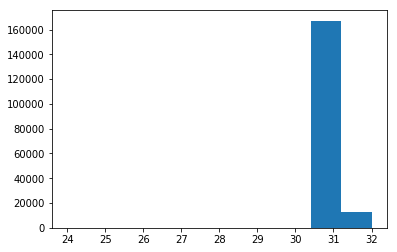

In [113]:
plt.hist([len(x) for x in lines])
plt.show()

In [155]:
with open("../data/ES/ES3_R1_pairs.txt") as f:
    pairs = [x[:-2].split(' ') for x in f.readlines()]

In [156]:
len(pairs)

74627

In [136]:
set_31 = [x[:31] for x in  K_1 + K_2]

In [160]:
set_31 = set(ans_3_31)

In [161]:
counter = 0

for l in lines + lines_2:
    if l in set_31:
    
        counter += 1

In [162]:
counter

283490

In [163]:
len(ans_3_31)

35